# Data Dictionary
<b>step</b>- maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

<b>type</b> - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

<b>amount</b> - amount of the transaction in local currency.

<b>nameOrig</b> - customer who started the transaction

<b>oldbalanceOrg</b> - initial balance before the transaction

<b>newbalanceOrig</b> - new balance after the transaction

<b>nameDest</b> - customer who is the recipient of the transaction

<b>oldbalanceDest</b> - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

<b>newbalanceDest</b> - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

<b>isFraud</b> - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

<b>isFlaggedFraud</b> - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Importing the Dataset

In [2]:
df=pd.read_csv('Fraud.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Handling the missing, duplicate values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.duplicated().sum()

0

<b>Observation:
* Number of missing values= 0
* Number of duplicate values= 0
  
<font color=red>Actions</font>:- since there are no missing or duplicate values. So, we don't need to handel them.

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Creating Heatmaps for multi-collinearity

In [30]:
corr_mat=df.corr()
corr_mat['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

<AxesSubplot:>

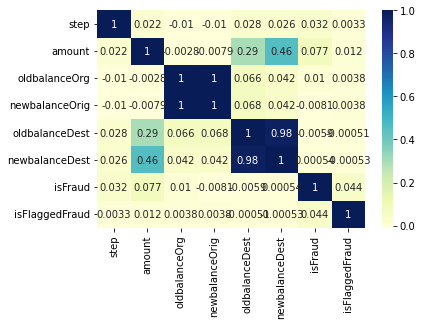

In [18]:
sns.heatmap(corr_mat,cmap="YlGnBu", annot=True)

<b>Observation:
* The<b> <font color=blue>oldbalanceDest</font> </b>is highly correlated to <b><font color=blue>newbalanceDest</font></b>.
* <b><font color=blue>isFraud </font></b>is has very less correlation to rest of the other independent variables.
* <b><font color=blue>oldbalanceOrg</font></b> has high correlation with<b>  <font color=blue>newbalanceOrig</font></b>.


### Countplot for Fraud and Non Fraud transactions

#### isFraud:-

In [26]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

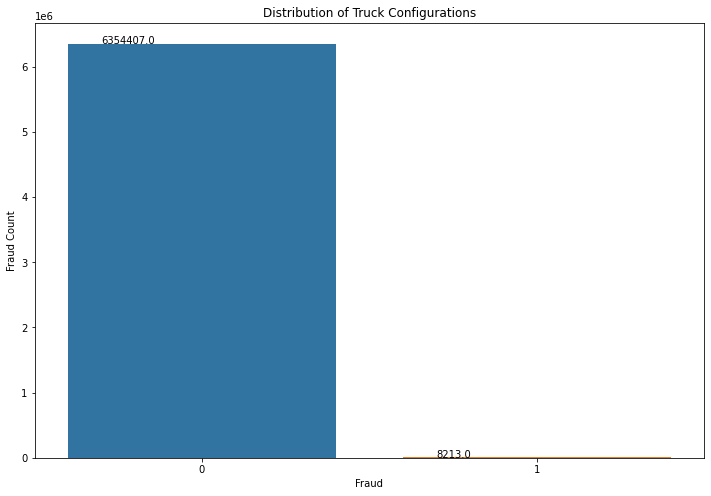

In [24]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="isFraud", data=df)
plt.title('Distribution of Truck Configurations')
plt.xlabel('Fraud')
plt.ylabel('Fraud Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

<b>Observation:-
* This dataset is highly imbalanced
* Total count of Non-Fraud transaction is<b> <font color=green> 6354407 </font>.
* Total count of Fraud transactions is <b><font color=green> 8213</font>.

## Analysis for Fraud Transactions

#### type:-

In [29]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

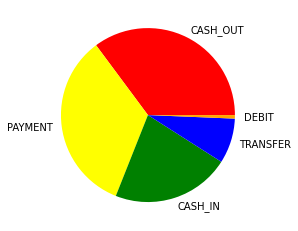

In [27]:
values=df['type'].value_counts().values
label=df['type'].value_counts().index
colors=['red','yellow','green','blue','orange']
plt.pie(values,labels=label,colors=colors)
plt.show()

<b>Observation:

* The CASH_OUT type transacions are the most recurring in <b>"type"</b>. Followed by <b>PAYMENT, then CASH_IN, TRANSFER and lastly DEBIT</b>.
* The <b>DEBIT</b> type transaction is the least recurring transation in <b>"type"</b> column.
* The transaction is splitted into 5 types.
    * <font color=blue>CASH_OUT</font> =   <b>2237500
    * <font color=blue>PAYMENT </font>  =  <b>2151495
    * <font color=blue>CASH_IN </font>   = <b>1399284
    * <font color=blue>TRANSFER</font>   = <b>532909
    * <font color=blue>DEBIT   </font>   = <b>41432

#### Identifying Fraud Transactions in "type" column

In [32]:
pd.crosstab(df['type'],df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


c:\users\sarth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


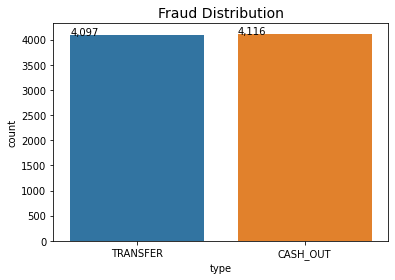

In [37]:
ax=sns.countplot("type",data=df[(df['isFraud']==1)])
plt.title('Fraud Distribution', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()

<b>Observation:-
* Only <b>Cash_Out</b> and <b>Transfer</b> has Fraud transaction occurences.
    * <b>Cash_Out</b> has <b><font color=red>4116</font></b> fraud transactions.
    * <b>Transfer</b> has <b><font color=red>4097</font></b> fraud transactions.

#### isFlaggedFraud:-

In [31]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

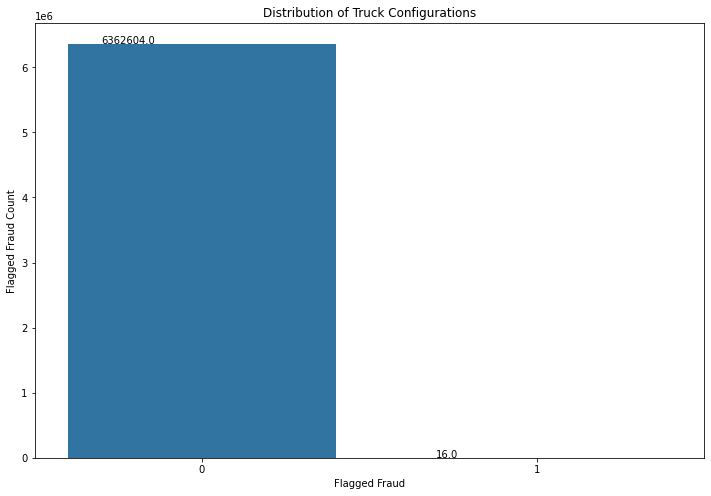

In [28]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="isFlaggedFraud", data=df)
plt.title('Distribution of Truck Configurations')
plt.xlabel('Flagged Fraud')
plt.ylabel('Flagged Fraud Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

<b> Observation:-
* The total count for<b> Non-Flagged Fraud</b> Transactions is<b> <font color=green>6362604</font></b>.
* The total count for <b>Flagged Fraud</b> Transactions have <b><font color=green>16</font></b>.

#### Step:-

In [38]:
fraud = df[df["isFraud"] == 1]
Notfraud = df[df["isFraud"] == 0]

#### Non-Fraud Distribution

In [39]:
Notfraud['transactionHour'] = Notfraud['step'] % 24
fraud['transactionHour'] = fraud['step'] % 24

C:\Users\sarth\AppData\Local\Temp/ipykernel_1808/3499407305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Notfraud['transactionHour'] = Notfraud['step'] % 24
C:\Users\sarth\AppData\Local\Temp/ipykernel_1808/3499407305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['transactionHour'] = fraud['step'] % 24


<AxesSubplot:xlabel='transactionHour', ylabel='Count'>

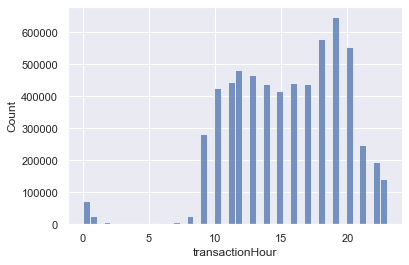

In [41]:
sns.histplot(data=Notfraud,x='transactionHour',bins=44)

#### Fraud Distribution

<AxesSubplot:xlabel='transactionHour', ylabel='Count'>

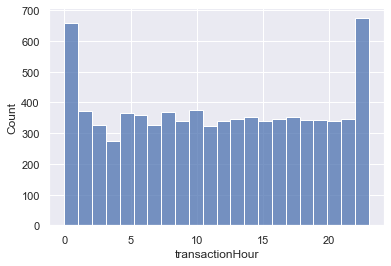

In [48]:
sns.histplot(x='transactionHour',data=fraud)

# Model Creation

### Separating Dependent and Independent variables from the dataset.

### Real Data

Taking necessary independent variables for training the model

In [49]:
indpendent=['amount','isFlaggedFraud','type']
dependent=['isFraud']
x_real=df[indpendent]
y_real=df[dependent]

#### Converting "type" column from object to numeric categories for feeding the ML algorithm

In [52]:
x_real['type']=df['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})

C:\Users\sarth\AppData\Local\Temp/ipykernel_1808/495076221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_real['type']=df['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})


In [54]:
x_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   isFlaggedFraud  int64  
 2   type            int64  
dtypes: float64(1), int64(2)
memory usage: 145.6 MB


In [55]:
y_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 1 columns):
 #   Column   Dtype
---  ------   -----
 0   isFraud  int64
dtypes: int64(1)
memory usage: 48.5 MB


## Creating a balance dataset using oversampling using Random OverSampler

In [56]:
ovr_sam=RandomOverSampler()
x_res,y_res=ovr_sam.fit_resample(x_real,y_real)

In [57]:
x_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12708814 entries, 0 to 12708813
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   isFlaggedFraud  int64  
 2   type            int64  
dtypes: float64(1), int64(2)
memory usage: 290.9 MB


In [58]:
y_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12708814 entries, 0 to 12708813
Data columns (total 1 columns):
 #   Column   Dtype
---  ------   -----
 0   isFraud  int64
dtypes: int64(1)
memory usage: 97.0 MB


Checking the fraud and non fraud transaction in <b><font color=blue>y_res</font></b> data.

In [59]:
y_res.isFraud.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

<b>Observation</b>
* Now that the data is balanced. It is now easy to train the model without getting less accuracy.

## Spliting the train and Test data

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,train_size=0.1,random_state=42)

In [66]:
x_train.count()

amount            1270881
isFlaggedFraud    1270881
type              1270881
dtype: int64

In [67]:
y_train.count()

isFraud    1270881
dtype: int64

## Spliting the validation data from the training data

In [68]:
x_new_train,x_val,y_new_train,y_val=train_test_split(x_train,y_train,train_size=0.8,random_state=42)

In [69]:
print("The new x_train data= x_new_train")
print("The new y_train data= y_new_train")
print("__________________________________")
print("The x test data= x_test")
print("The y test data= y_test")
print("__________________________________")
print("The x_val data= x_val")
print("The y_val data= y_val")
print("___________________")
print("real x data= x_real")
print("real y data= y_real")

The new x_train data= x_new_train
The new y_train data= y_new_train
__________________________________
The x test data= x_test
The y test data= y_test
__________________________________
The x_val data= x_val
The y_val data= y_val
___________________
real x data= x_real
real y data= y_real


In [70]:
x_val.count()

amount            254177
isFlaggedFraud    254177
type              254177
dtype: int64

In [71]:
y_val.count()

isFraud    254177
dtype: int64

## Training the model

Using Random Forest Classifier for the fraud classification

In [72]:
RF=RandomForestClassifier()

In [73]:
RF.fit(x_new_train,y_new_train)

C:\Users\sarth\AppData\Local\Temp/ipykernel_1808/634286051.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_new_train,y_new_train)


RandomForestClassifier()

## <b> <font color=blue>Using Model in Validation Data</font></n>

In [74]:
y_val_pred=RF.predict(x_val)

<b><font color=red>Classification Report</font></b>

In [76]:
clf_rep=classification_report(y_val,y_val_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    127426
           1       0.99      1.00      0.99    126751

    accuracy                           0.99    254177
   macro avg       0.99      0.99      0.99    254177
weighted avg       0.99      0.99      0.99    254177



<b><font color=red>Confusion Matrix</font></b>

In [77]:
mat=confusion_matrix(y_val,y_val_pred)
mat

array([[125871,   1555],
       [     0, 126751]], dtype=int64)

<b>Observation<b>:-
* Model perfomed well with the <b>Accuracy of <font color=green>99%</font></b> in the <b>Validation Data</b>.

## <b> <font color=blue>Using Model in Test Data</font></n>

In [78]:
y_test_pred=RF.predict(x_test)

<b><font color=red>Classification Report</font></b>

In [79]:
clf_rep=classification_report(y_test,y_test_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   5718473
           1       0.99      1.00      0.99   5719460

    accuracy                           0.99  11437933
   macro avg       0.99      0.99      0.99  11437933
weighted avg       0.99      0.99      0.99  11437933



<b><font color=red>Confusion Matrix</font></b>

In [80]:
mat=confusion_matrix(y_test,y_test_pred)
mat

array([[5647575,   70898],
       [      0, 5719460]], dtype=int64)

<b>Observation<b>:-
* Model perfomed well with the <b>Accuracy of <font color=green>99%</font></b> in the <b>Test Data</b>.

## Using Model in Actual Data

In [81]:
y_pred=RF.predict(x_real)

<b><font color=red>Classification Report</font></b>

In [82]:
clf_rep=classification_report(y_real,y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   6354407
           1       0.10      1.00      0.18      8213

    accuracy                           0.99   6362620
   macro avg       0.55      0.99      0.59   6362620
weighted avg       1.00      0.99      0.99   6362620



<b><font color=red>Confusion Matrix</font></b>

In [83]:
mat=confusion_matrix(y_real,y_pred)
mat

array([[6281656,   72751],
       [      0,    8213]], dtype=int64)

<b>Observation<b>:-
* Model perfomed well with the <b>Accuracy of <font color=green>99%</font></b> in the <b>Actual Data</b>.

# Candidate Expectations

### Answering the following questions.

1. <b>Data cleaning including missing values, outliers and multi-collinearity.</b>
    * <font color=red>There were no missing or duplicate values present in the dataset.</font>
    

2. <b>Describe your fraud detection model in elaboration.</b>
    * <font color=red>The classification algorithm used in this data is called Random Forest Classifier.</font>
    * <font color=red>Random forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.</font>
    * <font color=red>The output/prediction will be in 2 classes:-</font>
        * <font color=red>1 (Fraud) and 0 (Non-Fraud)</font>

3. <b>How did you select variables to be included in the model?</b>
    * <font color=red>In these 10 columns:-</font>
        * <font color=red>There were only 3 useful independent variables:-</font>
            1. <font color=red> amount</font>
            2. <font color=red>isFlaggedFraud</font>
            3. <font color=red>type</font>
            
    * <font color=red> Rest of the columns were not useful for the model.</font>

4. <b>Demonstrate the performance of the model by using best set of tools.</b>
    * <font color=red>The model has <b><font color=blue>accuracy of 99%</font></b> in the <b><font color=blue>Validation data</font></b>.</font>
        * <b>Confusion matrix</b>
            * [125871,   1555]<br>
               [0   ,    126751]
    * <font color=red>The model has <b><font color=blue>accuracy of 99%</font></b> in the <b><font color=blue>Test data</font></b> also.</font>
        * <b>Confusion matrix</b>
            * [5647575,   70898]<br>
               [0  ,      5719460]

5. What are the key factors that predict fraudulent customer?
    * <font color=red>The key factors on predicting the fraudulent customer were:-</font>
        * <font color=red><b>Type</b> of transactions:-</font>
            1. <font color=red>CASH_OUT</font>
            2. <font color=red>PAYMENT</font>
            3. <font color=red>CASH_IN</font>
            4. <font color=red>TRANSFER</font>
            5. <font color=red>DEBIT</font>
            
        * <font color=red>Transactions that were flagged fraud.</font>
        * <font color=red>The transaction amount.</font>


6. <b>Do these factors make sense? If yes, How? If not, How not?</b>
    * <font color=red>No, these factors don't really makes sense because:-</font>
        * <font color=red>All of the 3 independent features were not correlated to the dependent feature.</font>
        
        

7. <b>What kind of prevention should be adopted while company update its infrastructure?</b>
    * <font color=red>At this point, I am not sure about the actual preventions required.</font>

8. <b>Assuming these actions have been implemented, how would you determine if they work?</b>
    * <font color=red>The answer is same as the previous one.</font>